<a href="https://colab.research.google.com/github/usmaaangul/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/blob/main/Code_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone Github

In [ ]:
!git clone https://github.com/usmaaangul/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo.git

Cloning into 'Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo'...
remote: Enumerating objects: 315, done.
remote: Counting objects: 100% (177/177), done.
remote: Compressing objects: 100% (177/177), done.
remote: Total 315 (delta 7), reused 163 (delta 0), pack-reused 138
Receiving objects: 100% (315/315), 34.14 MiB | 36.68 MiB/s, done.
Resolving deltas: 100% (26/26), done.


# Importing Using Libraries

















In [ ]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


# Matrix
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
from keras.metrics import Recall, Precision


from keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard


#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras import layers

from keras.models import Model


from keras.callbacks import ReduceLROnPlateau

# specifically for cnn


from keras.layers import BatchNormalization, MaxPool2D, Conv2DTranspose, Concatenate, Input

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D ,GlobalAveragePooling2D
 
import tensorflow as tf
import random as rn
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils.np_utils import to_categorical

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2    
import imageio              
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

from keras import backend as K
import gc

# Loading Images

In [ ]:
IMG_SIZE=512
epoch_size=50
batch_size=2
X1=list()
Z1=list()

def make_train_data(DIR_img,DIR_msk):

  #_______Load Images_________#

  for img in tqdm(sorted(os.listdir(DIR_img))):
    path = os.path.join(DIR_img,img)
    
    img = cv2.imread(path,cv2.IMREAD_COLOR) # RGB Image
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    #plt.imshow(img)
    X1.append(np.array(img))

  #_______Load Masks_________#

  for msk in tqdm(sorted(os.listdir(DIR_msk))):
    path = os.path.join(DIR_msk,msk)

    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE) # Gray Scale mask
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    #plt.imshow(img)
    Z1.append(np.array(img))


In [ ]:
'''image_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Chase/train/image'
mask_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Chase/train/label'

make_train_data(image_dir,mask_dir)'''

In [ ]:
'''image_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Chase/validate/images'
mask_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Chase/validate/labels'

make_train_data(image_dir,mask_dir)'''

In [ ]:
'''image_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Chase/test/images'
mask_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Chase/test/labels'

make_train_data(image_dir,mask_dir)'''

In [ ]:
image_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Drive/test/images'
mask_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Drive/test/label'

make_train_data(image_dir,mask_dir)

100%|██████████| 20/20 [00:00<00:00, 482.63it/s]


In [ ]:
image_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Drive/train/images'
mask_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Drive/train/labels'

make_train_data(image_dir,mask_dir)

100%|██████████| 18/18 [00:00<00:00, 487.81it/s]


In [ ]:
image_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Drive/validate/images'
mask_dir='/content/Semantic-Segmentation-of-Retinal-Diseases-using-U-Net-Architecture-repo/Drive/validate/labels'

make_train_data(image_dir,mask_dir)

100%|██████████| 2/2 [00:00<00:00, 157.27it/s]


# Data Augmentation

In [ ]:
len(Z1)

40

In [ ]:
len(X1)

40

In [ ]:
from albumentations import HorizontalFlip, VerticalFlip, ElasticTransform, GridDistortion, OpticalDistortion

def augment_data(images, masks):
  X=list()
  Y=list()
  temp=0
  for x, y in zip(images, masks):
    

    if temp==0:
      plt.subplot(121)
      plt.imshow(x)
      plt.title("Orignal Image")

      plt.subplot(122)
      plt.imshow(y)
      plt.title("Orignal Mask")
      plt.show()



    #_____________________________#
    aug = HorizontalFlip(p=1.0)
    augmented = aug(image=x, mask=y)
    x1 = augmented["image"]
    y1 = augmented["mask"]

    #x1 = cv2.resize(x1, (IMG_SIZE,IMG_SIZE))
    
    X.append(x1)

    #y1 = cv2.resize(y1, (IMG_SIZE,IMG_SIZE))
    #y1=np.array(y1)
    #y1=np.expand_dims(y1, axis=-1)
    Y.append(y1)

    if temp==0:
      plt.subplot(121)
      plt.imshow(x1)
      plt.title("HorizontalFlif Image")
      

      plt.subplot(122)
      plt.imshow(y1)
      plt.title("HorizontalFlif Mask")
      plt.show()



    #_____________________________#
    aug = VerticalFlip(p=1.0)
    augmented = aug(image=x, mask=y)
    x2 = augmented["image"]
    y2 = augmented["mask"]

    #x2 = cv2.resize(x2, (IMG_SIZE,IMG_SIZE))
    X.append(x2)

    #y2 = cv2.resize(y2, (IMG_SIZE,IMG_SIZE))
    #y2=np.array(y2)
    #y2=np.expand_dims(y2, axis=-1)
    Y.append(y2)

    if temp==0:
      plt.subplot(121)
      plt.imshow(x2)
      plt.title("VerticalFlip Image")
      
      plt.subplot(122)
      plt.imshow(y2)
      plt.title("VerticalFlip Mask")
      plt.show()



    #_____________________________#
    aug = ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03)
    augmented = aug(image=x, mask=y)
    x3 = augmented['image']
    y3 = augmented['mask']

    #x3 = cv2.resize(x3, (IMG_SIZE,IMG_SIZE))
    X.append(x3)

    #y3 = cv2.resize(y3, (IMG_SIZE,IMG_SIZE))
    #y3=np.array(y3)
    #y3=np.expand_dims(y3, axis=-1)
    Y.append(y3)

    if temp==0:
      plt.subplot(121)
      plt.imshow(x3)
      plt.title("ElasticTransform Image")
      
      plt.subplot(122)
      plt.imshow(y3)
      plt.title("ElasticTransform Mask")
      plt.show()


    #_____________________________#
    aug = GridDistortion(p=1)
    augmented = aug(image=x, mask=y)
    x4 = augmented['image']
    y4 = augmented['mask']

    #x4 = cv2.resize(x4, (IMG_SIZE,IMG_SIZE))
    X.append(x4)

    #y4 = cv2.resize(y4, (IMG_SIZE,IMG_SIZE))
    #y4=np.array(y4)
    #y4=np.expand_dims(y4, axis=-1)
    Y.append(y4)

    if temp==0:
      plt.subplot(121)
      plt.imshow(x4)
      plt.title("GridDistortion Image")
      
      plt.subplot(122)
      plt.imshow(y4)
      plt.title("GridDistortion Mask")
      plt.show()


    #_____________________________#
    aug = OpticalDistortion(p=1, distort_limit=2, shift_limit=0.5)
    augmented = aug(image=x, mask=y)
    x5 = augmented['image']
    y5 = augmented['mask']

    #x5 = cv2.resize(x5, (IMG_SIZE,IMG_SIZE))
    X.append(x5)

    #y5 = cv2.resize(y5, (IMG_SIZE,IMG_SIZE))
    #y5=np.array(y5)
    #y5=np.expand_dims(y5, axis=-1)
    Y.append(y5)

    if temp==0:
      plt.subplot(121)
      plt.imshow(x5)
      plt.title("OpticalDistortion Image")


      plt.subplot(122)
      plt.imshow(y5)
      plt.title("OpticalDistortion Mask")
      plt.show()




    #_____________________________#
    #x = cv2.resize(x, (IMG_SIZE,IMG_SIZE))
    X.append(x)

    #y = cv2.resize(y, (IMG_SIZE,IMG_SIZE))
    #y=np.array(y)
    #y=np.expand_dims(y, axis=-1)
    Y.append(y)
    
    temp=temp+1

            

  return X,Y

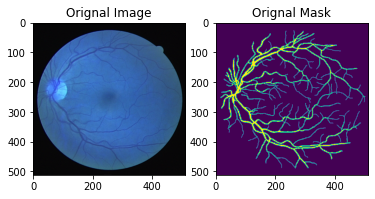

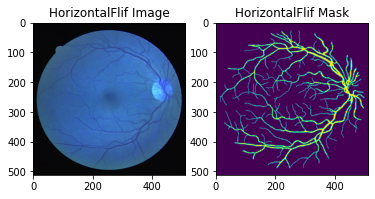

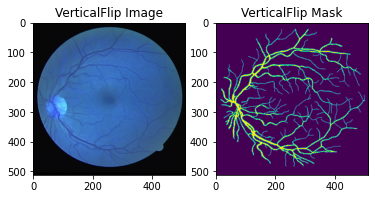

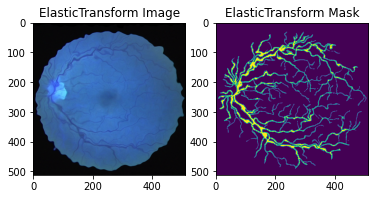

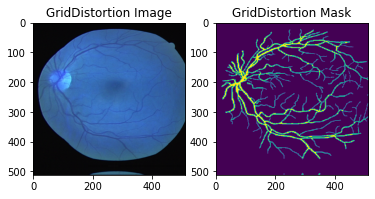

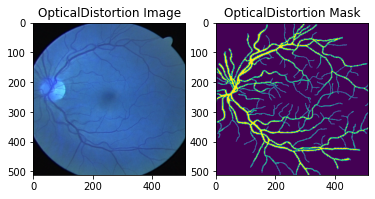

In [ ]:
X,Y=augment_data(X1,Z1)

# Normalize the data

In [ ]:
X=np.array(X)
X=X/255

Y=np.array(Y)
Y=Y/255

# Display some images and it's masks

In [ ]:
X.shape

(240, 512, 512, 3)

In [ ]:
Y.shape

(240, 512, 512)

In [ ]:
#check=Y
#check=np.expand_dims(check, axis=-1)
#check = np.concatenate([check, check, check], axis=-1)
#check.shape

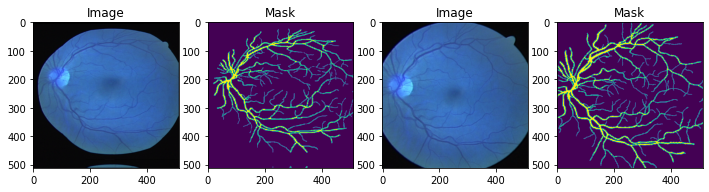

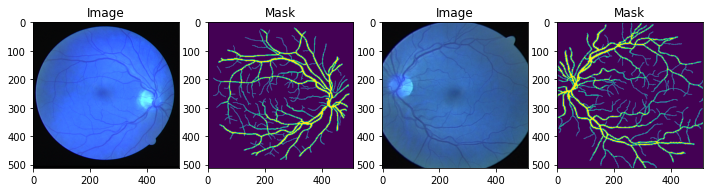

In [ ]:
## displaying data loaded by our function
for i in range(2):
  num=np.random.randint(10)
  plt.figure(figsize=(12,6))
  plt.subplot(1,4,1)
  plt.imshow(X[num])
  plt.title("Image")
  plt.subplot(1,4,2)
  plt.imshow(Y[num])
  plt.title("Mask")

  num=np.random.randint(10)
  plt.subplot(1,4,3)
  plt.imshow(X[num+1])
  plt.title("Image")
  plt.subplot(1,4,4)
  plt.imshow(Y[num+1])
  plt.title("Mask")
  plt.show()

# Split data into training and testing and Validation set

In [ ]:
#print(Y.shape)
#Y=np.expand_dims(Y, axis=-1)
#print(Y.shape)
#Y = np.concatenate([Y, Y, Y], axis=-1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
#x_valid, x_test, y_valid, y_test = train_test_split(x_test,y_test, test_size=0.5)

In [ ]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

### Model uning Functionl API's from keras

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model

def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def encoder_block(inputs, num_filters):
    x = conv_block(inputs, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

def decoder_block(inputs, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(inputs)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024)

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="UNET")
    return model

In [ ]:
inputs = tf.keras.layers.Input((IMG_SIZE, IMG_SIZE,1))
model = build_unet((IMG_SIZE, IMG_SIZE,3))
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )
model.summary()

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 512, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                              

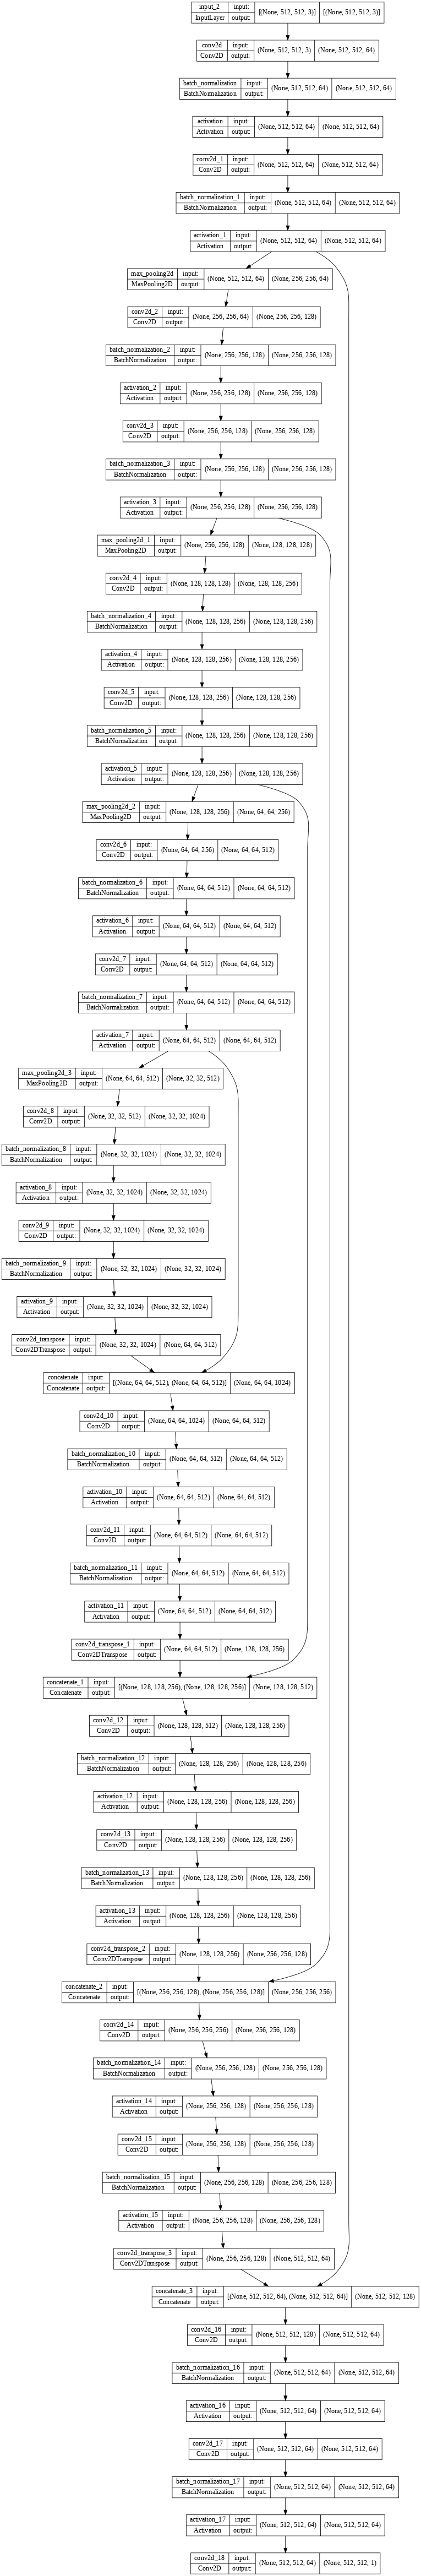

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True,show_layer_names=True,dpi=60)

In [ ]:
History1 = model.fit(x_train,y_train,
                     batch_size=batch_size,epochs = 50, 
                     validation_data = (x_test,y_test),verbose = 1)


history_df = pd.DataFrame(History1.history)

Epoch 1/50
96/96 [==============================] - 74s 535ms/step - loss: 0.2112 - accuracy: 0.8895 - val_loss: 0.3203 - val_accuracy: 0.8812
Epoch 2/50
96/96 [==============================] - 53s 555ms/step - loss: 0.1368 - accuracy: 0.9107 - val_loss: 0.3951 - val_accuracy: 0.8693
Epoch 3/50
96/96 [==============================] - 53s 551ms/step - loss: 0.1264 - accuracy: 0.9127 - val_loss: 0.3163 - val_accuracy: 0.8615
Epoch 4/50
96/96 [==============================] - 52s 542ms/step - loss: 0.1192 - accuracy: 0.9142 - val_loss: 0.2358 - val_accuracy: 0.8778
Epoch 5/50
96/96 [==============================] - 53s 554ms/step - loss: 0.1188 - accuracy: 0.9146 - val_loss: 0.1671 - val_accuracy: 0.9034
Epoch 6/50
96/96 [==============================] - 53s 554ms/step - loss: 0.1130 - accuracy: 0.9157 - val_loss: 0.2156 - val_accuracy: 0.8910
Epoch 7/50
96/96 [==============================] - 52s 545ms/step - loss: 0.1127 - accuracy: 0.9156 - val_loss: 0.1084 - val_accuracy: 0.9202

In [ ]:
x_train[0].shape

(512, 512, 3)

In [ ]:
x_test[0].shape

(512, 512, 3)

In [ ]:
y_train[0].shape

(512, 512)

## More Process

In [ ]:
#model.save('model.h5')

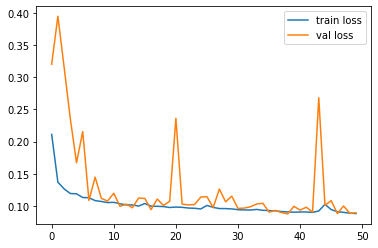

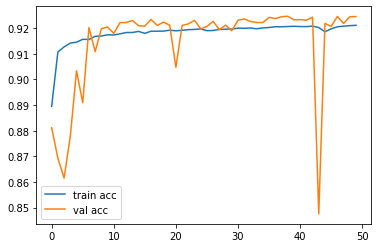

In [ ]:
# plot the loss
plt.plot(History1.history['loss'], label='train loss')
plt.plot(History1.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(History1.history['accuracy'], label='train acc')
plt.plot(History1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
Pred = model.predict(x_test, batch_size=16)

In [ ]:
Pred=Pred>0.5

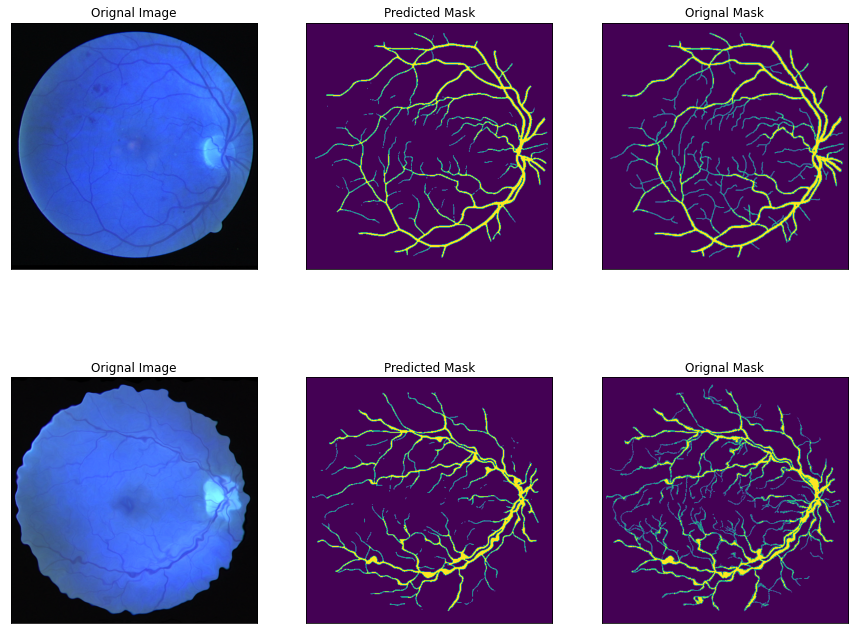

In [ ]:
plt.figure(figsize=(15,25))
for i in range(0,6,3):

    num=np.random.randint(len(y_test))

    plt.subplot(4,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[num]) #[:,:,0]
    plt.title('Orignal Image')
    
    plt.subplot(4,3,i+2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(Pred[num].reshape(512,512))
    plt.title('Predicted Mask')

    plt.subplot(4,3,i+3)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(y_test[num])
    plt.title('Orignal Mask')
plt.show()

In [ ]:
Pred1 = model.predict(x_test, batch_size=16)

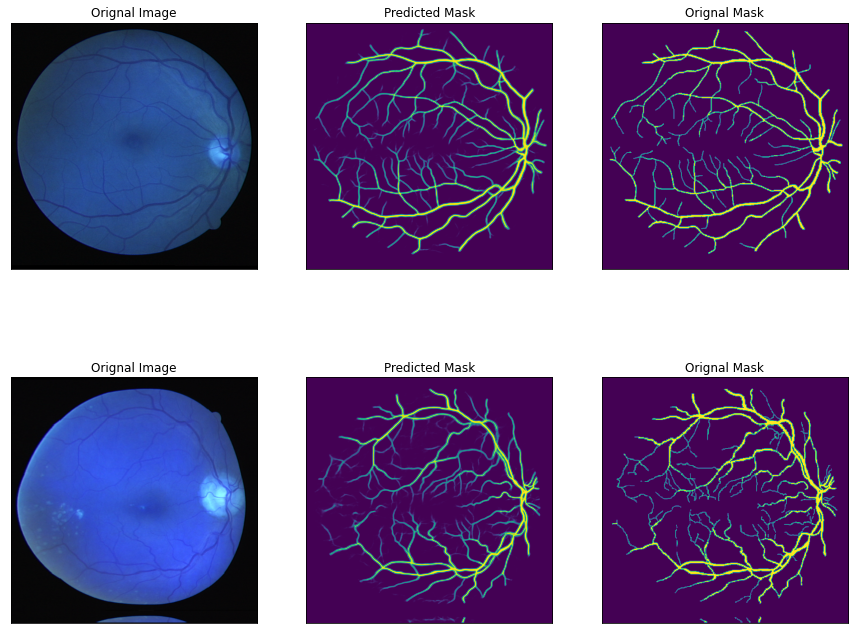

In [ ]:
plt.figure(figsize=(15,25))
for i in range(0,6,3):

    num=np.random.randint(len(y_test))

    plt.subplot(4,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[num]) #[:,:,0]
    plt.title('Orignal Image')
    
    plt.subplot(4,3,i+2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(Pred1[num].reshape(512,512))
    plt.title('Predicted Mask')

    plt.subplot(4,3,i+3)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(y_test[num])
    plt.title('Orignal Mask')
plt.show()